<a href="https://colab.research.google.com/github/AbdulWahabRaza123/ML/blob/main/PlantDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# !pip install patool

In [62]:
# import patoolib
# def extract_rar(rar_file_path, destination_folder):
#     if not os.path.exists(destination_folder):
#         os.makedirs(destination_folder)
#     patoolib.extract_archive(rar_file_path, outdir=destination_folder)
#     print(f"Extraction complete. Files are in: {destination_folder}")

In [63]:
# extract_rar("/content/data.rar","/content/drive/MyDrive/temp")

In [72]:
from PIL import Image
import os
import matplotlib.pyplot as plt

def read_images_from_folder(root_folder):
    data = []
    for label in os.listdir(root_folder):
        label_path = os.path.join(root_folder, label)
        if os.path.isdir(label_path):
            image_data = []
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
                    image = Image.open(file_path)
                    image_data.append(image)
            data.append((label, image_data))

    return data

In [70]:
root_folder = '/content/drive/MyDrive/temp/data'
image_data = read_images_from_folder(root_folder)

Label: Apple___Apple_scab, Number of Images: 100


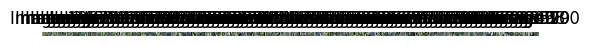

Label: Apple___Black_rot, Number of Images: 100


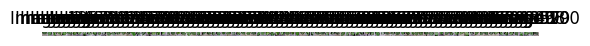

In [71]:
for label, images in image_data:
    print(f"Label: {label}, Number of Images: {len(images)}")
    for i, image in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(image)
        plt.title(f"Image {i + 1}")
        plt.axis('off')

    plt.show()

label is  Apple___Apple_scab
label is  Apple___Black_rot


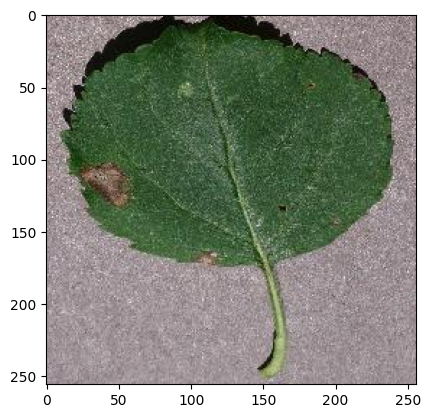

In [76]:
for label, images in image_data:
  print("label is ",label)
  first_image = images[0]
  plt.imshow(first_image)
  first_image.show()

In [77]:
labels=[
    "Apple___Apple_scab",
    "Apple___Black_rot"
]

In [78]:
from tensorflow.keras.applications import InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87910968/87910968 [==============================] - 1s 0us/step


In [79]:
from tensorflow.keras import layers, models

num_classes = 2
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
predictions = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=predictions)


In [80]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     validation_split=0.2
# )
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/temp/data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/temp/data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

model.fit(train_generator, epochs=10, validation_data=validation_generator)


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/10
5/5 [==============================] - 107s 17s/step - loss: 0.4229 - accuracy: 0.7375 - val_loss: 13.5319 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 74s 15s/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 235.8479 - val_accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 75s 15s/step - loss: 0.0073 - accuracy: 0.9937 - val_loss: 225.2272 - val_accuracy: 0.5000
Epoch 4/10
5/5 [==============================] - 73s 15s/step - loss: 0.2603 - accuracy: 0.9312 - val_loss: 708.9413 - val_accuracy: 0.5000
Epoch 5/10
5/5 [==============================] - 75s 15s/step - loss: 0.1684 - accuracy: 0.9438 - val_loss: 566.4343 - val_accuracy: 0.5000
Epoch 6/10
5/5 [==============================] - 74s 15s/step - loss: 0.0602 - accuracy: 0.9875 - val_loss: 143.6086 - val_accuracy: 0.5000
Epoch 7/10
5/5 [==============================] - 73s 15s/step - loss: 0.

In [82]:
for layer in model.layers:
    layer.trainable = True

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=5, validation_data=validation_generator)

Epoch 1/5
5/5 [==============================] - 95s 15s/step - loss: 0.1213 - accuracy: 0.9937 - val_loss: 5.8243 - val_accuracy: 0.6500
Epoch 2/5
5/5 [==============================] - 76s 16s/step - loss: 0.1944 - accuracy: 0.9688 - val_loss: 62.9063 - val_accuracy: 0.5250
Epoch 3/5
5/5 [==============================] - 80s 16s/step - loss: 0.0658 - accuracy: 0.9812 - val_loss: 589.9410 - val_accuracy: 0.5000
Epoch 4/5
5/5 [==============================] - 83s 17s/step - loss: 0.0601 - accuracy: 0.9750 - val_loss: 440.7006 - val_accuracy: 0.5000
Epoch 5/5
5/5 [==============================] - 75s 15s/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 467.9567 - val_accuracy: 0.5000


In [84]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array


In [83]:
def interpret_predictions(predictions, label_mapping):
    # Assuming label_mapping is a dictionary mapping class indices to labels
    predicted_label_index = np.argmax(predictions)
    predicted_label = label_mapping[predicted_label_index]
    confidence = predictions[0][predicted_label_index]

    return predicted_label, confidence


In [85]:
def predict_image(model, image_path):
    processed_image = preprocess_image(image_path)
    predictions = model.predict(processed_image)
    return predictions

In [86]:
# Example usage
image_path = '/content/drive/MyDrive/temp/data/Apple___Apple_scab/image (1).JPG'
predictions = predict_image(model, image_path)

label_mapping = {0: 'Apple___Apple_scab', 1: 'Apple___Black_rot'}  # Update with your actual label mapping
predicted_label, confidence = interpret_predictions(predictions, label_mapping)

print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence}")


1/1 [==============================] - 4s 4s/step
Predicted Label: Apple___Apple_scab
Confidence: 1.0


In [87]:
model.save('/content/drive/MyDrive/temp/fine_tuned_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [88]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

fine_tuned_model = load_model('/content/drive/MyDrive/temp/fine_tuned_model.h5')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/temp/data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

y_pred = fine_tuned_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred_classes, target_names=class_labels))
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

Found 200 images belonging to 2 classes.
7/7 [==============================] - 24s 3s/step
                    precision    recall  f1-score   support

Apple___Apple_scab       0.50      1.00      0.67       100
 Apple___Black_rot       0.00      0.00      0.00       100

          accuracy                           0.50       200
         macro avg       0.25      0.50      0.33       200
      weighted avg       0.25      0.50      0.33       200

Confusion Matrix:
 [[100   0]
 [100   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
